In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor

In [60]:
data=pd.read_csv('/content/DOGE-USD.csv')

In [61]:
data.sample(6)

,Date,Open,High,Low,Close,Adj Close,Volume
629,2019-07-31,0.002816,0.002908,0.002816,0.002899,0.002899,2.131098e+07
325,2018-09-30,0.005867,0.005910,0.005828,0.005906,0.005906,1.339660e+07
1708,2022-07-14,0.061933,0.062632,0.059741,0.062394,0.062394,3.480905e+08
1152,2021-01-04,0.009785,0.011421,0.007878,0.009767,0.009767,1.372399e+09
203,2018-05-31,0.003429,0.003513,0.003317,0.003398,0.003398,8.971080e+06
826,2020-02-13,0.003064,0.003216,0.002973,0.003026,0.003026,1.685439e+08


In [62]:
data.describe(
)

,Open,High,Low,Close,Adj Close,Volume
count,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1.760000e+03
mean,0.059575,0.063096,0.056126,0.059619,0.059619,1.016258e+09
std,0.101325,0.109152,0.093695,0.101379,0.101379,3.563999e+09
min,0.001046,0.001210,0.001002,0.001038,0.001038,1.431720e+06
25%,0.002550,0.002616,0.002500,0.002548,0.002548,2.307671e+07
50%,0.003476,0.003603,0.003356,0.003495,0.003495,8.981855e+07
75%,0.070633,0.075035,0.068478,0.070657,0.070657,6.565853e+08
max,0.687801,0.737567,0.608168,0.684777,0.684777,6.941068e+10


In [63]:
data.shape

(1761, 7)

In [64]:
data.isnull().sum(
)

,0
Date,0
Open,1
High,1
Low,1
Close,1
Adj Close,1
Volume,1


In [65]:
data.corr(numeric_only=True)

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.993904,0.993707,0.992514,0.992514,0.554850
High,0.993904,1.000000,0.986497,0.995104,0.995104,0.619321
Low,0.993707,0.986497,1.000000,0.994575,0.994575,0.519991
Close,0.992514,0.995104,0.994575,1.000000,1.000000,0.588678
Adj Close,0.992514,0.995104,0.994575,1.000000,1.000000,0.588678
Volume,0.554850,0.619321,0.519991,0.588678,0.588678,1.000000


In [66]:
data['Date']=pd.to_datetime(data['Date'],infer_datetime_format=True)
data.set_index('Date',inplace=True)

/tmp/ipython-input-1394861649.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['Date']=pd.to_datetime(data['Date'],infer_datetime_format=True)


In [67]:
data=data.dropna()

In [68]:
data.isnull().any()

,0
Open,False
High,False
Low,False
Close,False
Adj Close,False
Volume,False


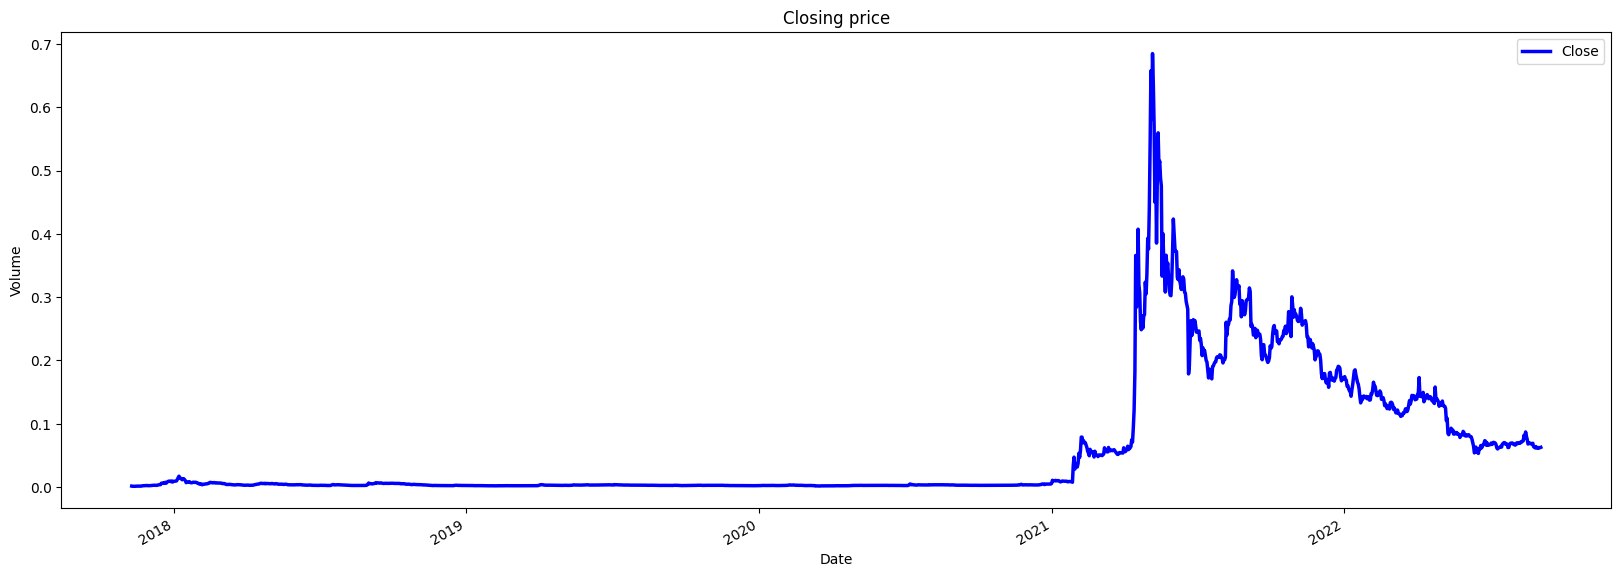

In [69]:
plt.figure(figsize=(20,7))
x=data.groupby('Date')['Close'].mean()
x.plot(linewidth=2.5,color='b')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Closing price')
plt.legend()
plt.show()

In [71]:
data = data.reset_index()[["Date", "Close", "Volume", "High", "Low"]]

In [72]:
data['Close_lag1']=data['Close'].shift(1)
data['Close_lag2']=data['Close'].shift(1)
data['VOlume_lag1']=data['Volume'].shift(1)

The `SettingWithCopyWarning` often arises when you perform chained indexing, like `data[some_condition]['new_column'] = value`. In your case, `data` might be a slice itself (e.g., after `dropna()` could return a view), and then you are adding new columns to it. To ensure you are working on a copy and prevent future warnings, you can explicitly make a copy of the DataFrame before adding new columns.

In [73]:
data = data.copy()
data['Close_lag1']=data['Close'].shift(1)
data['Close_lag2']=data['Close'].shift(1)
data['Volume_lag1']=data['Volume'].shift(1)

This will prevent the `SettingWithCopyWarning` by ensuring `data` is an independent DataFrame that you can safely modify.

In [74]:
data['Rolling_mean_5']=data['Close'].shift(1).rolling(window=5).mean()
data['Rolling_std_5']=data['Close'].shift(1).rolling(window=5).std()

In [75]:
data.dropna()

,Date,Close,Volume,High,Low,Close_lag1,Close_lag2,VOlume_lag1,Volume_lag1,Rolling_mean_5,Rolling_std_5
5,2017-11-14,0.001184,2660340.0,0.001239,0.001131,0.001211,0.001211,2481270.0,2481270.0,0.001206,0.000136
6,2017-11-15,0.001339,2840180.0,0.001351,0.001179,0.001184,0.001184,2660340.0,2660340.0,0.001159,0.000070
7,2017-11-16,0.001390,3423010.0,0.001424,0.001286,0.001339,0.001339,2840180.0,2840180.0,0.001195,0.000107
8,2017-11-17,0.001313,2787480.0,0.001394,0.001274,0.001390,0.001390,3423010.0,3423010.0,0.001232,0.000139
9,2017-11-18,0.001373,1648260.0,0.001385,0.001254,0.001313,0.001313,2787480.0,2787480.0,0.001287,0.000087
...,...,...,...,...,...,...,...,...,...,...,...
1755,2022-08-30,0.061525,328934727.0,0.064408,0.060550,0.063887,0.063887,315005254.0,315005254.0,0.064385,0.002760
1756,2022-08-31,0.061330,309748693.0,0.063333,0.061058,0.061525,0.061525,328934727.0,328934727.0,0.062871,0.001121
1757,2022-09-01,0.062372,328765413.0,0.062479,0.060194,0.061330,0.061330,309748693.0,309748693.0,0.062423,0.001215
1758,2022-09-02,0.061635,273453013.0,0.062712,0.060947,0.062372,0.062372,328765413.0,328765413.0,0.062180,0.001032


In [76]:
X=data.drop(['Date','Close'],axis=1)
y=data['Close']

In [77]:
split_index=int(len(data)*0.8)
X_train=X.iloc[:split_index]
X_test=X.iloc[split_index:]

y_train=y.iloc[:split_index]
y_test=y.iloc[split_index:]

In [78]:
model=RandomForestRegressor(n_estimators=200,
                            max_depth=10,
                            random_state=42)

In [79]:
model.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42)

In [81]:
prediction=model.predict(X_test)

In [82]:
mae=mean_absolute_error(y_test,prediction)
mse=mean_squared_error(y_test,prediction)
rmse=np.sqrt(mse)
r2=r2_score(y_test,prediction)

In [83]:
print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)
print("MSE:", mse)

MAE: 0.01171818394825851
RMSE: 0.01563193037993928
R2 Score: 0.9395170329932614
MSE: 0.0002443572474032686


In [85]:
results = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": prediction
})

results.to_csv("doge_predictions.csv", index=False)

In [86]:
results

,Actual,Predicted
0,0.239930,0.245957
1,0.241386,0.242526
2,0.233142,0.237092
3,0.207071,0.211340
4,0.201027,0.212509
...,...,...
347,0.061525,0.062276
348,0.061330,0.062812
349,0.062372,0.062395
350,0.061635,0.062846
